# Esercitazione 7
## Esercizio 1
### Punto 1

Creo una funzione _autocorrelation_, che utilizzo per stimare l'autocorrelazione nei diversi casi.

Mostro la funzione di autocorrelazione per $10^4$ valori dell'energia interna U, per i tre stati di aggregazione. Non utilizzo $M=5 \times 10^5$ valori ma solo 10000, poichè la computazione delle autocorrelazioni diventerebbe estremamente lunga.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation (vec, var_, tmax):
    func = np.zeros(tmax)
    for t in range (tmax-1):
        norm = tmax - t
        sum1 = 0.
        sum2a = 0.
        sum2b = 0.
        for tprimo in range(tmax-t):
            sum1 += vec[tprimo] * vec[tprimo+t]
            sum2a += vec[tprimo]
            sum2b += vec[t+tprimo]
        func [t]  = (sum1 - sum2a*sum2b/norm) / var_ / norm
        if (t%2000==0):
            print ('autoc computed for element %s' %t)
    func[0] = 1
    return func

In [2]:
Us = np.loadtxt("es07_12/1_1_solid/output.istU", usecols=(0), delimiter=',', unpack='true')
Ul = np.loadtxt("es07_12/1_1_liquid/output.istU", usecols=(0), delimiter=',', unpack='true')
Ug = np.loadtxt("es07_12/1_1_gas/output.istU", usecols=(0), delimiter=',', unpack='true')

autoc_s = autocorrelation((Us), np.var(Us), len(Us))
autoc_l = autocorrelation((Ul), np.var(Ul), len(Ul))
autoc_g = autocorrelation((Ug), np.var(Ug), len(Ug))

autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000
autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000
autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000


Solid                                   Liquid                                         Gas


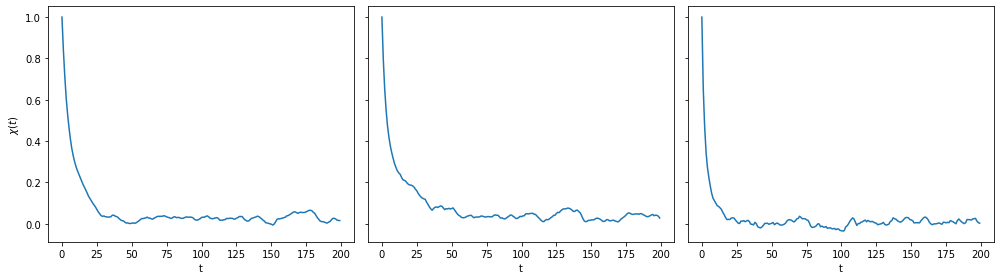

In [3]:
print ("Solid                                   Liquid                                         Gas")

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(14, 4))

axs[0].set_ylabel(r"$\chi (t)$")
axs[0].set_xlabel("t")
axs[1].set_xlabel("t")
axs[2].set_xlabel("t")

axs[0].plot(autoc_s[:200])
axs[1].plot(autoc_l[:200])
axs[2].plot(autoc_g[:200])

In [4]:
Ps = np.loadtxt("es07_12/1_1_solid/output.istP", usecols=(0), delimiter=',', unpack='true')
Pl = np.loadtxt("es07_12/1_1_liquid/output.istP", usecols=(0), delimiter=',', unpack='true')
Pg = np.loadtxt("es07_12/1_1_gas/output.istP", usecols=(0), delimiter=',', unpack='true')

autoc_Ps = autocorrelation(Ps, np.var(Ps), len(Ps))
autoc_Pl = autocorrelation(Pl, np.var(Pl), len(Pl))
autoc_Pg = autocorrelation(Pg, np.var(Pg), len(Pg))

autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000
autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000
autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000


Solid                                   Liquid                                         Gas


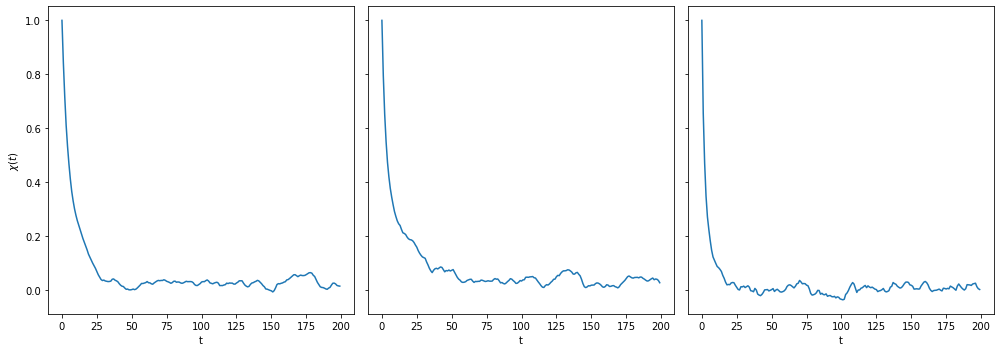

In [5]:
print ("Solid                                   Liquid                                         Gas")


fig2, axs2 = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(14, 5))

axs2[0].set_ylabel(r"$\chi (t)$")
axs2[0].set_xlabel("t")
axs2[1].set_xlabel("t")
axs2[2].set_xlabel("t")
 
axs2[0].plot(autoc_s[:200])
axs2[1].plot(autoc_l[:200])
axs2[2].plot(autoc_g[:200])

Osservo che l'autocorrelazione arriva a zero dopo circa 30 valori calcolati. Pertanto, è necessario che i blocchi abbiano almeno tale dimensione.

### Punto 2

Con i dati generati, computo l'incertezza al variare della dimensione dei blocchi L. Per fare ciò, partendo dai $5 \times 10^5$ dati generati, li raggruppo in un numero variabile di blocchi ed eseguo il calcolo della varianza a blocchi. Mostro di seguito le deviazioni standard per le stime finali dopo una media a blocchi su U e P, per i 3 
stati di aggregazione. Creo una funzione errors per stimare in maniera efficiente le incertezze partendo dal vettore dei valori.

In [6]:
def errors(L, vec, M):
    err = [None]*len(L)
    k = 0
    for Lblock in (L):
        if (Lblock%1000==0):
            print ("...with L =",Lblock)
        N = int (M/Lblock)
        mean2 = 0
        for Nblock in range(N):
            mean1 = 0
            for i in range (Lblock):
                mean1 += vec[Nblock*Lblock+i]
            mean1 /= Lblock
            mean2 += mean1*mean1
        mean2 /= N
        err[k] = np.sqrt(1./(N)*(mean2-pow(np.mean(vec),2))) 
        k +=1
    return err

L=[]
simulations = ["gas", "liquid", "solid"]
for i in range (20,5000,20):
    L.append(i)

M = 500000

Analysis for the gas state...
...with L = 1000
...with L = 2000


/tmp/ipykernel_25714/943948383.py:16: RuntimeWarning: invalid value encountered in sqrt
  err[k] = np.sqrt(1./(N)*(mean2-pow(np.mean(vec),2)))


...with L = 3000
...with L = 4000
Analysis for the liquid state...
...with L = 1000
...with L = 2000
...with L = 3000
...with L = 4000
Analysis for the solid state...
...with L = 1000
...with L = 2000
...with L = 3000
...with L = 4000
         Gas                                Liquid                                         Solid


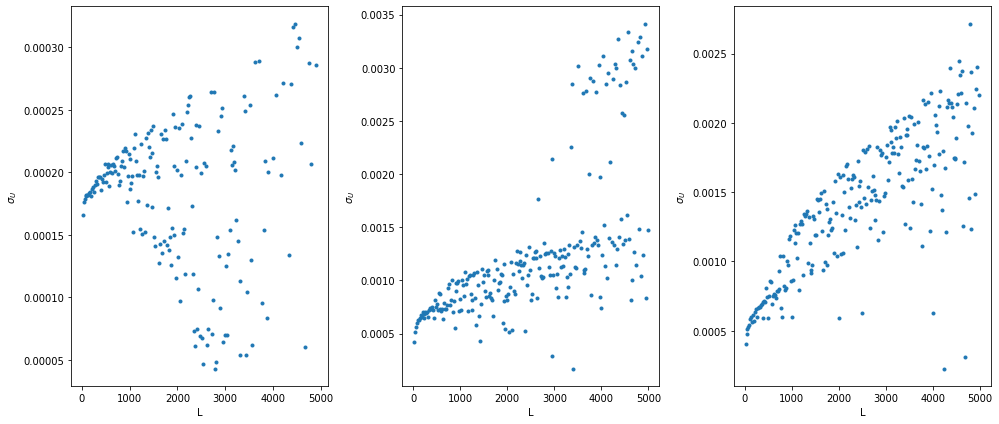

In [7]:
#ENERGY

U_L, axs_UL = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(14, 6))
i= 0
for sim in simulations:
    print('Analysis for the %s state...' % sim)
    U = np.loadtxt("es07_12/1_2_%s/output.istU" %sim, usecols=(0), delimiter=',', unpack='true')
    err = errors(L,U,M)
    axs_UL[i].plot (L,err, linestyle="", marker=".")
    axs_UL[i].set_ylabel(r'$\sigma_{U}$')
    axs_UL[i].set_xlabel("L")
    i +=1
      
print ("         Gas                                Liquid                                         Solid")

Analysis for the gas state...
...with L = 1000
...with L = 2000


/tmp/ipykernel_25714/943948383.py:16: RuntimeWarning: invalid value encountered in sqrt
  err[k] = np.sqrt(1./(N)*(mean2-pow(np.mean(vec),2)))


...with L = 3000
...with L = 4000
Analysis for the liquid state...
...with L = 1000
...with L = 2000
...with L = 3000
...with L = 4000
Analysis for the solid state...
...with L = 1000
...with L = 2000
...with L = 3000
...with L = 4000
   Gas                                   Liquid                                         Solid


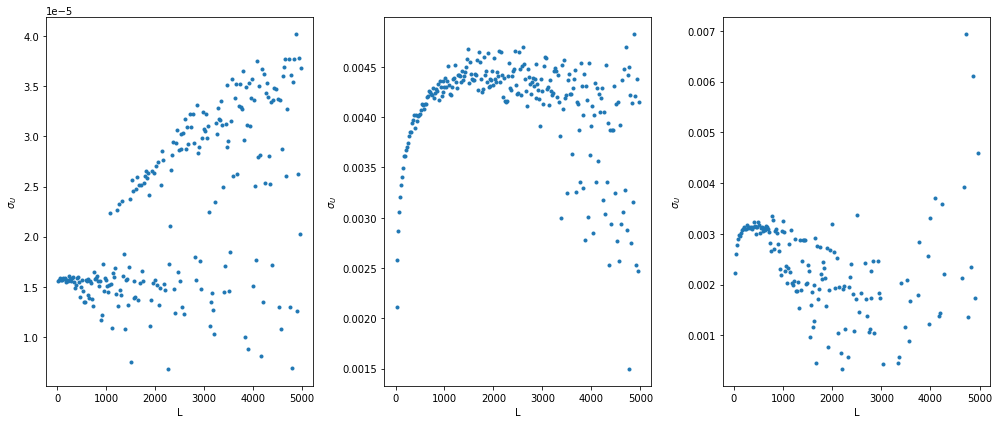

In [8]:
#PRESSURE
P_L, axs_PL = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(14, 6))
i= 0
for sim in simulations:
    print('Analysis for the %s state...' % sim)
    P = np.loadtxt("es07_12/1_2_%s/output.istP" %sim, usecols=(0), delimiter=',', unpack='true')
    err = errors(L,P,M)
    axs_PL[i].plot (L,err, linestyle="", marker=".")
    axs_PL[i].set_ylabel(r'$\sigma_{U}$')
    axs_PL[i].set_xlabel("L")
    i +=1

print ("   Gas                                   Liquid                                         Solid")

## Esercizio 2

Calcolo i valori di $g(r)$, dopo aver diviso in bin la dimensione spaziale $r$. Rappresento i valori ottenuti da tale istogramma per i tre stati di aggregazione.

          Gas                                   Liquid                                         Solid


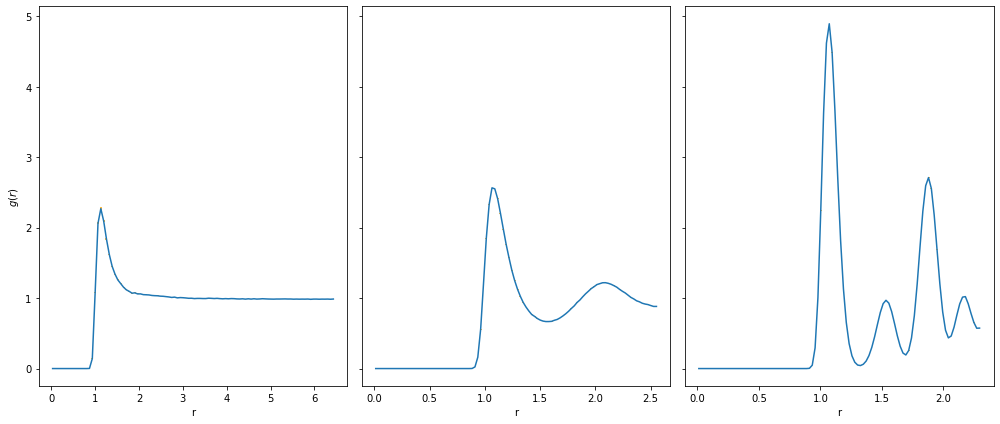

In [9]:
import numpy as np
import matplotlib.pyplot as plt

nblks, bin_value_g, bin_mean_g, bin_error_g  = np.loadtxt("es07_12/2_gas/output.gave.0", usecols=(0,1,2,3), delimiter=',', unpack='true')
nblks, bin_value_l, bin_mean_l, bin_error_l  = np.loadtxt("es07_12/2_liquid/output.gave.0", usecols=(0,1,2,3), delimiter=',', unpack='true')
nblks, bin_value_s, bin_mean_s, bin_error_s  = np.loadtxt("es07_12/1_2_solid/output.gave.0", usecols=(0,1,2,3), delimiter=',', unpack='true')


fig2, axs2 = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(14, 6))


axs2[0].set_ylabel(r"$ g(r)$")
axs2[0].set_xlabel("r")
axs2[1].set_xlabel("r")
axs2[2].set_xlabel("r")

axs2[0].errorbar(bin_value_g, bin_mean_g, yerr=bin_error_g, ecolor = "orange")
axs2[1].errorbar(bin_value_l, bin_mean_l, yerr=bin_error_l, ecolor = "orange")
axs2[2].errorbar(bin_value_s, bin_mean_s, yerr=bin_error_s, ecolor = "orange")

print ("          Gas                                   Liquid                                         Solid")

## Esercizio 3-4

Eseguo di nuovo la simulazione del codice di molecular dynamics implementato nell'esercitazione 4, utilizzando però l'algoritmo di Verlet e aggiungendo il calcolo di g(r). I dati di input sono gli stessi dell'esercizio 7.1-2: Argon nei 3 stati. In questo caso devo eseguire una conversione per passare da unità di Lennard-Jones a SI.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#needed to convert LJ to SI
k_b = 1.38E-23
sigma = 0.34E-9 #SI units    
epsilon = 120*k_b
mass = 39.948*1.66E-27 #SI units


Rappresento di seguito l'andamento delle grandezze U/N e P nei 3 stati di aggregazione, al variare del numero di blocchi.

                                                   Solid state           


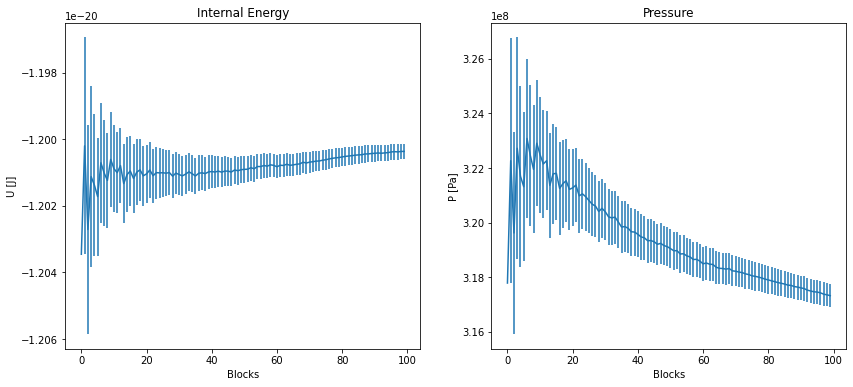

In [11]:
U_4 = np.loadtxt("es07_34/4_solid/ave_epot.out")
P_4 = np.loadtxt("es07_34/4_solid/ave_pres.out")

fig,ax = plt.subplots(1, 2, figsize=(14, 6));

ax[0].errorbar(range(len(U_4)), U_4[:,2]*epsilon, yerr=U_4[:,3]*epsilon)
ax[0].set_ylabel("U [J]")
ax[0].set_xlabel("Blocks")
ax[0].set_title("Internal Energy")
ax[1].errorbar(range(len(P_4)), P_4[:,2]*epsilon/(sigma**3), yerr=P_4[:,3]*epsilon/(sigma**3))
ax[1].set_ylabel("P [Pa]")
ax[1].set_xlabel("Blocks")
ax[1].set_title("Pressure")
print("                                                   Solid state           ")

                                                   Liquid state           


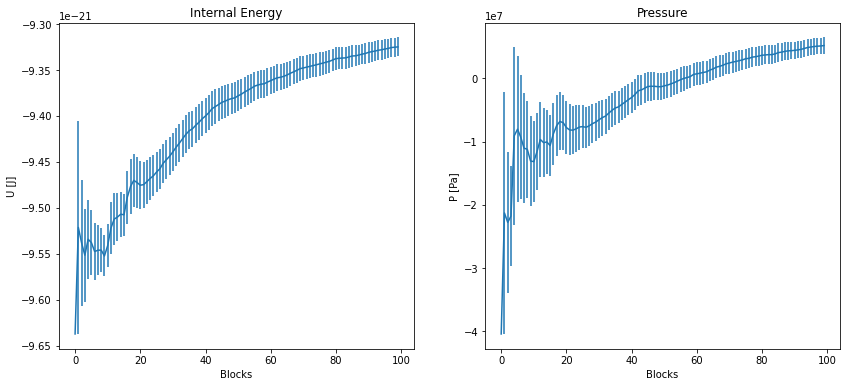

In [13]:
U_4 = np.loadtxt("es07_34/4_liquid/ave_epot.out")
P_4 = np.loadtxt("es07_34/4_liquid/ave_pres.out")

fig,ax = plt.subplots(1, 2, figsize=(14, 6));

ax[0].errorbar(range(len(U_4)), U_4[:,2]*epsilon, yerr=U_4[:,3]*epsilon)
ax[0].set_ylabel("U [J]")
ax[0].set_xlabel("Blocks")
ax[0].set_title("Internal Energy")
ax[1].errorbar(range(len(P_4)), P_4[:,2]*epsilon/(sigma**3), yerr=P_4[:,3]*epsilon/(sigma**3))
ax[1].set_ylabel("P [Pa]")
ax[1].set_xlabel("Blocks")
ax[1].set_title("Pressure")
print("                                                   Liquid state           ")

                                                   Gas state           


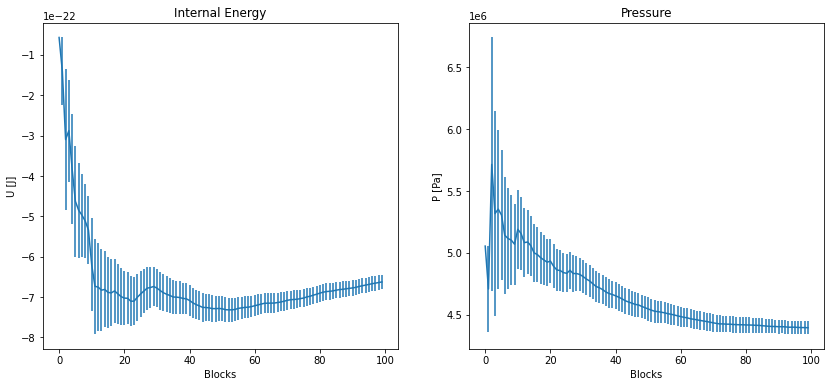

In [15]:
U_4 = np.loadtxt("es07_34/4_gas/ave_epot.out")
P_4 = np.loadtxt("es07_34/4_gas/ave_pres.out")

fig,ax = plt.subplots(1, 2, figsize=(14, 6));

ax[0].errorbar(range(len(U_4)), U_4[:,2]*epsilon, yerr=U_4[:,3]*epsilon)
ax[0].set_ylabel("U [J]")
ax[0].set_xlabel("Blocks")
ax[0].set_title("Internal Energy")
ax[1].errorbar(range(len(P_4)), P_4[:,2]*epsilon/(sigma**3), yerr=P_4[:,3]*epsilon/(sigma**3))
ax[1].set_ylabel("P [Pa]")
ax[1].set_xlabel("Blocks")
ax[1].set_title("Pressure")
print("                                                   Gas state           ")

Confronto ora l'andamento di g(r) ottenuto con i due diversi algoritmi.

Text(0.5, 1.0, 'Solid state')

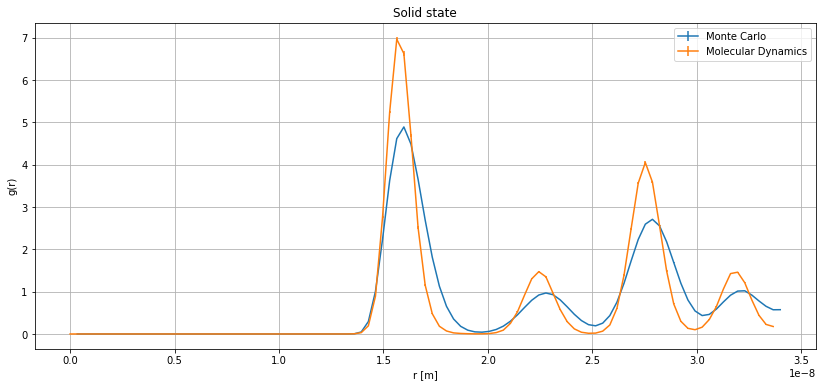

In [17]:
g_1 = np.loadtxt("es07_12/1_2_solid/output.gave.0", delimiter = ',')
g_4 = np.loadtxt("es07_34/4_solid/output_gave.out")

plt.figure(figsize=[14,6])
plt.errorbar(g_1[:,0]*sigma, g_1[:,2],yerr=g_1[:,3], label = 'Monte Carlo')
plt.errorbar(np.arange(0,100)*sigma, g_4[:,0],yerr=g_4[:,1], label = 'Molecular Dynamics')
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.grid(True)
plt.legend()
plt.title('Solid state')

Text(0.5, 1.0, 'Liquid state')

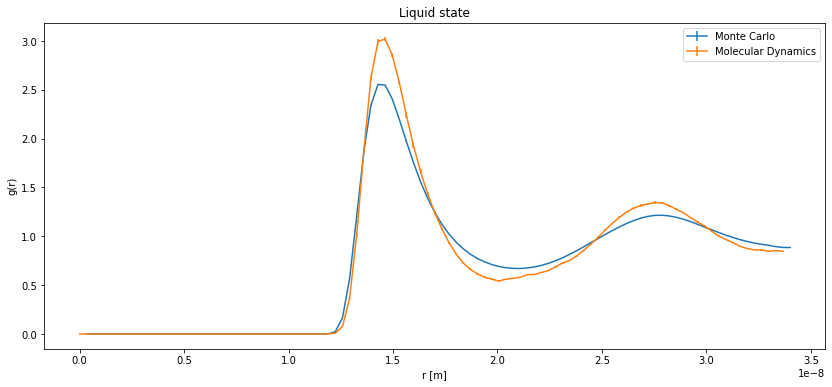

In [19]:
g_1 = np.loadtxt("es07_12/1_2_liquid/output.gave.0", delimiter = ',')
g_4 = np.loadtxt("es07_34/4_liquid/output_gave.out")

plt.figure(figsize=[14,6])
plt.errorbar(g_1[:,0]*sigma, g_1[:,2],yerr=g_1[:,3], label = 'Monte Carlo')
plt.errorbar(np.arange(0,100)*sigma, g_4[:,0],yerr=g_4[:,1], label = 'Molecular Dynamics')
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.title('Liquid state')

Text(0.5, 1.0, 'Gas state')

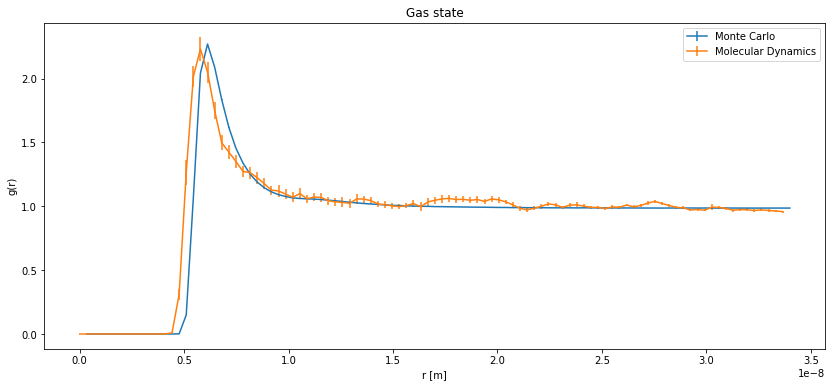

In [20]:
g_1 = np.loadtxt("es07_12/1_2_gas/output.gave.0", delimiter = ',')
g_4 = np.loadtxt("es07_34/4_gas/output_gave.out")

plt.figure(figsize=[14,6])
plt.errorbar(g_1[:,0]*sigma, g_1[:,2],yerr=g_1[:,3], label = 'Monte Carlo')
plt.errorbar(np.arange(0,100)*sigma, g_4[:,0],yerr=g_4[:,1], label = 'Molecular Dynamics')
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.title('Gas state')

L'andamento di g(r) risulta simile confrontando i risultati dei i due codici, seppure quello di MolDyn presenti picchi e ventri più accentuati e gli errori siano maggiori.